In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 
 
x_train = [
    [1, 2], [5, 6],
    [3, 4], [7, 8],
    [-1, 2], [-5, 6],
    [-3, 4], [-7, 8], [0, 0]
]
y_train = [1, 1, 1, 1, 0, 0, 0, 0, 1]
 
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)
grid_searcher.fit(x_train, y_train)
clf_best = grid_searcher.best_estimator_
 
print('Best params = ', clf_best.get_params())

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=20 ................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    2.8s finished


In [ ]:
# сохранение и распаковка обученной модели

In [3]:
from sklearn.externals import joblib
# предполагаем что clf - обучен выше
joblib.dump(clf, 'Model_learn', compress=1)

['Model_learn']

In [4]:
clf = joblib.load('Model_learn')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

[0.86428571 0.13571429]


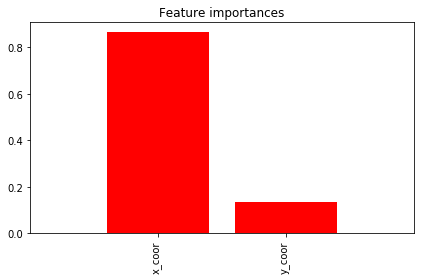

In [6]:
 
x_train = [
    [1, 2], [5, 6],
    [3, 4], [7, 8],
    [-1, 2], [-5, 6],
    [-3, 4], [-7, 8], [0, 0]
]
y_train = [1, 1, 1, 1, 0, 0, 0, 0, 1]
 
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
 
importances = clf_rf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
 
indices = np.argsort(importances)[::-1]
names_indices = ['x_coor', 'y_coor']
 
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="r")
plt.xticks(range(len(importances)), names_indices, rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()